# MNIST·从零到一

MINIST是一个由人类手写数字构成的图像数据集。它的作者为Yann LeCun、Corinna Cortes与Christopher J.C. Burges。该数据集曾被用作分类算法的开发与评估。给定任一张图像，给出该图像对应的数字。这个任务经常被用在深度学习的入门教程中。它足够简单——包含10个类别的图像分类问题；同时又足够复杂——人类手写的数字可以非常潦草、难以辨识。

这篇教程同样以MNIST为实验内容载体。不过与其它教程不同的地方在于，我们将真正意义上从零开始，一步一步实现一个功能完善的深度学习项目。

在这个过程中你将会逐步掌握以下内容。

## 数据搜集与处理

大多数深度学习教程提供了打包好的数据集，可以实现一行代码直接调用。这种情况在现实中几乎是不可能的。有时候用于训练的数据处理工作量甚至会超过你构建模型所花费的精力。

在这个项目中，你需要自行下载MNIST数据文件，并自行编写代码实现文件读取与解析。

## 模型构建

MNIST任务相对简单，因此你不需要构建超级复杂的神经网络。在这个项目中你需要使用Keras API以两种不同的方式来构建一个深度神经网络模型。

## 模型训练

模型训练是深度神经网络成长不可获取的过程。本项目中你将会学到模型训练过程中的几个重要参数。

## 模型评估

模型评估的意义在于反映当前模型的真实水平。训练与评估是深度学习工作的一对孪生兄弟，形影不离。

## 模型保存

训练好的模型只是存活在你的内存中。你将学会如何保存自己的劳动成果，以便今后再利用。

准备好了吗？让我们开始吧！

## 认识Alex
首先介绍助教Alex，他将会伴随你的整个学习过程。

In [1]:
from tutor import Tutor
alex = Tutor("Alex")

Hi, I'm Alex. Good to see you!


## 解析MNIST

在这个章节，你需要独立完成MNIST数据集下载与文件读取功能。通常这是深度学习项目的第一步。

MNIST是一个公开数据集。你可以通过搜索引擎找到它的网址。请将你找到的网址填写在下方。


In [2]:
mnist_url = ""

### 下载文件
请将数据集文件放置在 `download` 目录下。如果文件是压缩文件，请提前将其解压缩。完成后请在下方代码块中填写对应的文件路径。

In [3]:
training_image_file = "download/train-images-idx3-ubyte"
training_label_file = "download/train-labels-idx1-ubyte"
test_image_file = "download/t10k-images-idx3-ubyte"
test_label_file = "download/t10k-labels-idx1-ubyte"

Alex将会诸葛检查你下载的文件是否完整。

In [4]:
alex.check_files(training_image_file, training_label_file, test_image_file, test_label_file)


[Alex] 训练用图像数据集文件OK!
[Alex] 训练用标签数据集文件OK!
[Alex] 测试用图像数据集文件OK!
[Alex] 测试用标签数据集文件OK!


怎么样，你下载的文件是否全部合格？

虽然现代互联网环境已经非常成熟，很少有下载文件损坏的状况出现，但是初学者入门安全第一。另外请养成从官方渠道获取原始数据的习惯。你将会在今后的工作中受益于此。

### 读取文件

使用Python读取文件是一项基础技能。神经网络的训练文件几乎全部以文件的形式存储在磁盘中，训练前的一项重要工作就是将它们读入内存，有时还需要做数据预处理与增强。不要担心，你将会在今后的项目中遇到这部分内容。今天我们先从简单的文件读取入手。

下面这段代码演示了如何从一个文本文件中读取文本内容。该文本文件仅包含3个数字，一行一个。

In [5]:
with open('text.txt', 'rt') as f:
    print(f.readline())
    print(f.readline())
    print(f.readline())

1

2

3


现在该你了。请注意，MNIST数据文件并非文本文件。你需要在它的官方文档中找到它的数据格式定义，并量身定制数据读取方法。请将你的方法实现代码填充在下方的函数中。函数的输入与输出变量已经写在 `docstring` 中。

> 线索：open

首先是用于读取图像的函数。

In [6]:
def read_mnist_pixels(pixel_file):
    """读取MNIST数据文件中的图像像素信息。
    
    Args:
        pixel_file: 存储图像的数据集文件路径
        
    Returns:
        magic_number: magic_number
        num_images: 样本数量
        num_rows: 图像高度
        num_cols: 图像宽度
        pixels: 一个包含全部像素值的list
    """
    f = open(pixel_file, 'rb')

    magic_number = int.from_bytes(f.read(4), byteorder='big')
    num_images = int.from_bytes(f.read(4), byteorder='big')
    num_rows = int.from_bytes(f.read(4), byteorder='big')
    num_cols = int.from_bytes(f.read(4), byteorder='big')

    pixels = []
    for _ in range(num_images * num_rows * num_cols):
        pixels.append(int.from_bytes(f.read(1), byteorder='big'))

    f.close()

    return magic_number, num_images, num_rows, num_cols, pixels

其次是用于读取标签的函数。

In [7]:
def read_mnist_labels(label_file):
    """读取MNIST数据集文件中的标签信息。

    Args:
        label_file: 存储标签的数据集文件路径

    Returns:
        magic_number: magic_number
        num_items: 标签数量
        labels: 一个包含全部标签的list
    """
    f = open(label_file, 'rb')

    magic_number = int.from_bytes(f.read(4), byteorder='big')
    num_items = int.from_bytes(f.read(4), byteorder='big')

    labels = []
    for _ in range(num_items):
        labels.append(int.from_bytes(f.read(1), byteorder='big'))
        
    f.close()

    return magic_number, num_items, labels

Alex将会检查该函数的完成状况。

In [8]:
alex.check_reading_functions(read_mnist_pixels, read_mnist_labels)

[Alex] 正在检查图像数据集读取函数..
[Alex] 图像数据集读取方法OK！
[Alex] 正在检查标签数据集读取函数..
[Alex] 标签数据集读取方法OK！


怎么样，两个函数都满足要求了吗？你是否在 `open()` 函数的官方文档中找到了解决问题的线索？希望你不是从GitHub或者StackOverflow上复制粘贴的代码。请一定养成查阅官方文档的习惯。后期在构建神经网络时，你需要经常性地查询TensorFlow API的使用方法。

恭喜你！这两个函数实现之后，你已经成功实现了MNIST数据集的读取。这些数据将会用在神经网络的训练与测试中。不过在继续下一步之前，这里有几个非常重要的问题需要你回答。

1. 手写数字图像的数据结构是什么样子？
2. 与图像对应的标签的数据结构是什么样子？
3. 这些数据的数值类型是什么？
4. 这些数据的取值范围的上下界是什么？

请不要小看这些问题。深度学习项目的数据有时会极大的影响到模型的最终表现，请务必熟悉每个项目中你要处理的数据格式与内容。

## 构建神经网络模型

在这个章节中，你将使用TensorFlow构建一个深度神经网络模型来实现MNIST手写数字的识别。

构建神经网络的过程可能比你想的要简单。对于大部分任务来说，你都能找到范畴相近的深度学习模型作为参考,你可以站在前人的肩膀上继续工作。成熟的深度学习框架提供了足够灵活的模型构建方式，简化了这部分任务。例如TensorFlow的高阶API Keras就提供了大量用于构建神经网络以及训练的方法，可以极大的减轻工作量。

针对模型构建，Keras提供了 `Sequential API`、`Functional API` 与 `Subclassed model` 三种方式。这三种方式各有所长。作为初学者，本项目中你需要使用 `Functional API` 的方式构建深度神经网络。

### 使用Sequential API构建模型

在开始之前，先来看看一个采用 `Sequential API` 构建神经网络模型的例子。

![mnist](docs/mnist.png)

这是一个三层神经网络：一个输入层，一个隐含层，一个输出层。输入层的单元数为2，隐含层为4，输出层为3。这三层之间以稠密的方式顺序连接在一起。在TensorFlow中，你可以使用Keras高阶API的 `Dense` 方法来构建神经网络的稠密连接层，然后使用 `Sequential` 方法将它们串联在一起。这个模型与你之前在视频中看到的神经网络没有本质上的不同。

In [9]:
import tensorflow as tf

sequential_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(2, input_shape=(2,), name='inputs'),
        tf.keras.layers.Dense(4, activation='relu', name='hidden'),
        tf.keras.layers.Dense(3, name='outputs')
    ]
)

让我们把模型的概况打印出来看下。

In [10]:
sequential_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (Dense)               (None, 2)                 6         
_________________________________________________________________
hidden (Dense)               (None, 4)                 12        
_________________________________________________________________
outputs (Dense)              (None, 3)                 15        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


此时变量 `model` 保存的正是我们通常意义上所讲的“模型”。该模型现在一共包含三层，33个可训练参数。

使用 `Sequential API` 构建这种顺序堆叠layer的网络非常方便。大部分时间你只需要按图索骥，将正确的layer按顺序放在一个list中即可。这也是使用TensorFlow构建神经网络模型的主要工作内容：正确选择API，根据网络架构赋予它们正确的参数，最后组装在一起。

在这个过程中，你需要大量地查阅TensorFlow API文档。为防止你忘记，这里再次提醒一下：请从官方文档查阅API，并确定该API版本与你正在使用的TensorFlow版本相同。TensorFlow官方文档地址：https://www.tensorflow.org/api/stable

### 采用Functional API构建模型

在今后的深度学习项目中，你迟早会遇到 `Sequential API` 无法满足需求的状况。例如具备非线性拓扑结构、存在共享层或者多输入多输出的模型。这种情况下你需要使用 `Functional API`。不要担心，使用该方式构建模型与使用 `Sequential API` 构建模型过程非常相似。

动手时间到！请阅读官方关于 `Functional API` 的指南(Guide)，并构建具备如下结构的神经网络。

该模型按顺序包含：一个输入层，一个稠密连接层，一个 `Dropout` 层，一个输出层。其中稠密连接层的单元个数为 `128`，使用'`relu` 激活函数。Dropout的比例为 `0.2`。

模型的输入层将会使用一个图像样本的全部像素值，即28*28个像素。输出层的单元个数需要你来决定。请仔细想想你在上个章节构建的数据读取函数，它们获得的数据结构与类型是什么样子。

这对于你来说可能是一项有挑战的任务，毕竟需要自行查阅文档、仔细思考、书写代码。但是请记住“看过不等于会做”。亲自动手实践是人类掌握知识技能的必经阶段，请不要忘记你的目标。如果实在遇到无法解决的困难请向我求助。

那么，请完善下方的 `build_model` 方法，使用 `Functional API` 构建模型吧！

> 线索: https://www.tensorflow.org/guide

In [11]:
def build_model(units=128, rate=0.2):
    """使用Functional API构建神经网络。
    
    Args:
        units: 隐含层的节点个数
        rate: dropout的比例
    
    Returns:
        model: 构建好的keras模型
    """
    inputs = tf.keras.Input((28*28,))
    x = tf.keras.layers.Dense(units, activation='relu')(inputs)
    x = tf.keras.layers.Dropout(rate)(x)
    outputs = tf.keras.layers.Dense(10)(x)

    return tf.keras.Model(inputs, outputs)



照例，Alex将会对构建模型的函数做出初步检测。

In [12]:
alex.check_model_function(build_model)

[Alex] 看上去不错，给过！


如果Alex没有抱怨任何错误的话，恭喜你掌握了使用 `Functional API` 构建模型的方法！是时候前往下一章节了！

## 训练模型

模型的训练过程有点像地球上河道的形成过程。随着流水沿着地表流淌，平坦的地面经年累月会形成深深的沟壑。模型就像是地表，而数据如同流水。深度神经网络的训练过程可以粗略分解为两步。第一步，数据从模型中流过，在模型的作用下得到一个输出值，即前向传播。第二步，将输出值与标签值做比较，得到两者之间的差距，然后以此为依据反过来逐级改变模型中的参数，即反向传播。

训练模型的本质就是借助数据的流动来调整模型参数。

深度学习框架已经将这个过程尽可能的自动化。不过由于任务类型千差万别，模型种类各不相同，你仍然需要提供一些额外信息以便TensorFlow理解数据的流动方式。这也是本章节你需要实现的功能。包括：

- 将数据转换为模型能够接收的形式。
- 构建模型，并让数据流过该模型。
- 获得模型的输出，并与标签做比较，获得差异。
- 根据差异调整模型参数。

让我们开始吧！


### 前向传播的起源

前向传播的源头为数据。在第一个章节中你已经实现了两个函数来获得用于训练的图像像素值与标签值。像素值目前为一个list，包含60000个图像样本，每个样本包含28*28个像素。现在它们都串联在一起，而模型却无法分辨不同样本的边界在哪里。所以你需要把它们分割开来。标签数据面临相似的问题。

对于输入到神经网络中的输入，归一化是一种非常常见的操作。当前每个像素的数值在0-255之间。请对这些数值实施归一化操作。

另外，考虑到数据在模型训练过程中的重要性，TensorFlow提供了专门的 `Dataset` API来实现与训练有关的高效数据操作。在今后的项目中请尽可能使用该方法来组建训练数据集。

接下来该你了。假设你拿到一个包含N个图像样本的list与一个包含N个标签的list，该如何操作把它们转化为TensorFlow可以支持的 `Dataset` 格式？请将你的方法填写在下方的函数中。

> 线索: reshape, from_tensor_slice, 请注意神经网络的参数数据类型多为float32.

In [13]:
def build_dataset(pixel_list, label_list):
    """构建包含训练图像与标签的TensorFlow Dataset。

    Args:
        pixel_list: 包含N个图像像素数值的list
        label_list: 包含N个标签的list
    
    Returns:
        dataset: 一个TensorFlow Dataset，每次获取一个样本将返回一个图像与一个标签。
    """
    pixels = tf.constant(pixel_list, dtype=tf.float32) / 255
    pixels = tf.reshape(pixels, [-1, 28*28])
    pixels = tf.data.Dataset.from_tensor_slices(pixels)

    labels = tf.constant(label_list, dtype=tf.int64)
    labesl = tf.reshape(labels, [-1, 1])
    labels = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((pixels, labels))

    return dataset

Alex会很荣幸为你检查该方法是否符合预期。

In [14]:
alex.check_dataset_function(build_dataset)

[Alex] 看上去不错，加油！


### 反向传播的起源

模型预测值与标签的差异即为反向传播的起源。这个差异有一个专属名词叫做 `loss`。负责计算loss的函数称为损失函数。损失函数可以非常复杂，例如你在今后的人脸识别项目中看到的那样。不过不必担心，本项目的核心其实是一个简单分类问题。Keras提供了众多分类问题可用的损失函数供你选择。

请查阅与loss函数相关的官方文档，并结合项目库实际选择合适的损失函数，填写在下方。



In [15]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

同样，Alex会帮助检查该函数的正确性。

In [16]:
alex.check_loss_func(loss_func)

[Alex] 损失函数看上去很棒，请继续！


### 优化器——负责更新参数的操作者

深度神经网络使用梯度下降法来更新模型的权重参数。TensorFlow中的优化器（Optimizer）是这一参数更新算法的具体实现。你可以参与官方文档来了解不同的优化器之间的区别，并选择一款优化器用在本项目中。如果你不知道如何选择的话，`adam` 是一个不错的选择。

请在下方构建本项目中要用到的优化器。

In [17]:
optimizer = tf.keras.optimizers.Adam()

Alex会做一个简单的检测。

In [18]:
alex.check_optimizer(optimizer)

[Alex] 优化器看上去正常。请继续。


### 指标——评估模型的具体表现

之前你已经构建了损失函数来比较模型预测值与标签之间的差异，很显然，损失值越小，即差异越小，模型表现越好。但是有时候我们还需要更加直观的数值来表征模型的好坏。这正是指标（Metric）要做的事情。TensorFlow提供了大量现成的指标供你选择。例如分类任务可以选择准确率。

请阅读TensorFlow关于metrics模块的文档，并在下方构建本项目中将要使用的metric。

In [19]:
metric = tf.keras.metrics.SparseCategoricalAccuracy()

Alex将做一个辅助检查。

In [20]:
alex.check_metrics([metric])

[Alex] 评价指标选择看上去不错！请继续。


### 准备训练用超参数

神经网络训练时有几个关键的参数会影响到模型的训练过程，但是它们并非是模型本身参数的一部分。这些参数被称为超参数。

#### Epoch

Epoch常被翻译为“时代”、“纪元”。在深度学习中，一个Epoch代表模型在训练过程中见过了训练数据集的全部样本。可以理解为一个训练周期。在实际项目中，Epoch的数量取决于诸多因素，如问题的复杂程度、数据集大小、模型的规模等。在这个项目中，你可以自由调整Epoch的数值大小。你可以观察当Epoch取值不同时模型的不同表现。

请在下方设定 `epochs` 的大小。

In [21]:
epochs = 5

#### Batch Size

深度学习中模型的更新并非一步到位，而是一步一步逐渐完成的。每一次更新参数时，模型会使用一小部分样本作为参考。这一小部分样本被称为一个批次（Batch）。一个批次所包含的样本数量被称为批次大小（Batch Size）。批次大小是一个重要参数，有时会直接影响到你的模型表现。另外批次大小受限与GPU显存。这也是我们在之前的文章中建议新手如果有可能的话优先购买大显存显卡的理由。如果你在训练中遇到显存不足的提示，请尝试使用较小的批次大小。

请在下方设定 `batch_size` 的大小。

In [22]:
batch_size = 32

好了，作为初学者这将是你最早认识的两个超参数。今后的项目中你会慢慢遇到更多超参数，并逐渐理解它们的用途。

恭喜你，走到这一步实属不易！还有一个好消息，你已经完成了本项目中训练模型所需的大部分代码工作。接下来的代码将正式开始模型训练，准备好了吗？

使用你已经写好的数据集函数构建训练与测试数据集。

In [23]:
_, _, _, _, pixels_train = read_mnist_pixels(training_image_file)
_, _, labels_train = read_mnist_labels(training_label_file)
dataset_train = build_dataset(pixels_train, labels_train).batch(batch_size)

_, _, _, _, pixels_test = read_mnist_pixels(test_image_file)
_, _, labels_test = read_mnist_labels(test_label_file)
dataset_test = build_dataset(pixels_test, labels_test).batch(batch_size)

使用你编写的模型函数构造训练模型。

In [24]:
model = build_model(units=128, rate=0.2)

告知该模型应该使用何种loss函数、哪个优化器以及评估指标。

In [25]:
model.compile(optimizer=optimizer, loss=loss_func, metrics=[metric])

打印模型概况，做最后一步检查。

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


将以上的信息全部传递给模型，正式开始训练！

In [27]:
model.fit(dataset_train, epochs=epochs)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4739 - sparse_categorical_accuracy: 0.8633
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1610 - sparse_categorical_accuracy: 0.9526
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1158 - sparse_categorical_accuracy: 0.9649
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0774 - sparse_categorical_accuracy: 0.9759


怎么样，你的模型的分类准确率能达到多高？


## 模型评估

你还记得下载的数据集是分为训练数据集与测试数据集吗？你是否注意到目前为止我们还没有使用过测试数据集？此举为有意为之。为了真实反映模型的性能，模型在训练过程中无论如何都不可以接触测试数据集。否则就像学生期末考试时试卷上的题目都是平时做过的，测试也就失去了评价的意义。

让我们来测试一下模型在测试数据集上的真实性能吧！

In [28]:
model.evaluate(dataset_test)

313/313 [==============================] - 0s 910us/step - loss: 0.0820 - sparse_categorical_accuracy: 0.9755


[0.08196576684713364, 0.9754999876022339]

你对这个准确率表现还满意吗？

## 模型保存

如果你对模型及其满意，你很可能会想将模型保存并分享给其他人使用。TensorFlow 2中保存模型变成一件非常简单的事情。

In [29]:
model.save("mnist")

INFO:tensorflow:Assets written to: mnist/assets


注意这个时候模型的输出为原始值。如果你制作好的模型需要输出给工作部门的其他人使用的话，最好让模型的输出更加人性化，例如输出概率值。那么，请在下方为该模型添加概率数值转换功能吧！

> 线索：还记得前边介绍过的 `Sequential API`吗？Keras layer可以堆叠为一个Keras model, 实际上，Keras model也可以堆叠。

In [30]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

接下来，请Alex使用转换后的模型为我们实际演示MNIST的分类结果。

[Alex] 预测结果为：7


<IPython.core.display.Javascript object>


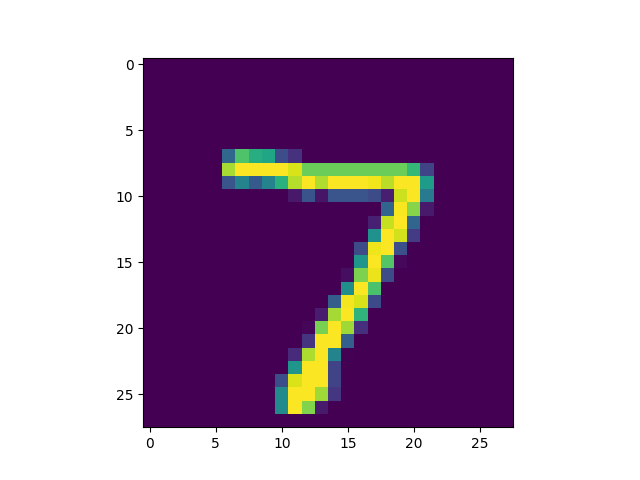

In [31]:
image = alex.demo(probability_model)

%matplotlib notebook
import matplotlib.pyplot as plt
plt.imshow(image)

怎么样，你的模型是否准确识别出了图像中的数字？

## 总结

恭喜，你已经成功完成了第一个神经网络项目！

这个项目虽小，但是五脏俱全。你通过自己的努力完成了以下任务：

1. 原始数据搜集与读取，训练数据生成与预处理。
2. 使用Sequential与Functional两种方式构建深度神经网络。
3. 构建训练所需的优化器、损失函数、评估指标。
4. 认识了Epoch与Batch Size这两个超参数。
5. 完成了第一个神经网络模型的训练与评估。
6. 成功保存了模型。

千里之行始于足下，希望这个小小的项目能够为你今后的学习构建一个坚实的基础。

在下一个项目中，你将会遇到如下技能挑战：

- 搜集并处理中等规模数据：超过20万张图像。
- 转换生成更加成熟的数据集存储方式：TFRecord文件。
- 构建更加复杂的神经网络模型。
- 学会如何保存训练进度。
- 以图表的方式记录训练日志，跟踪训练进展。

我们下期见！

更多深度学习相关知识，请关注微信公众号“流浪AI”。

![wechat](docs/wechat.png)